In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.style as st
st.use("ggplot")

In [269]:
df=pd.read_csv("newJordan.csv",usecols=["phone","religion","birthday","first","gender","lang","email"])

In [270]:
df.drop_duplicates(inplace=True)

In [271]:
df.groupby("gender")["gender"].count()

gender
female     977629
male      2053416
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender'>

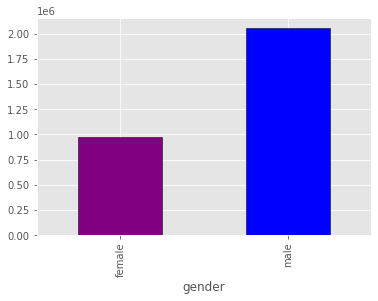

In [339]:
df.groupby("gender")["gender"].count().plot(kind="bar",color=("purple","blue"),edgecolor="black")

In [273]:
df.phone=df.phone.astype(str)

In [274]:
df.phone.count()

3099842

counting each phone carrier in jordan

In [275]:
Orange=df[df.phone.str.startswith("96277")].phone.count()
Zain=df[df.phone.str.startswith("96279")].phone.count()
Umniah=df[df.phone.str.startswith("96278")].phone.count()

there are 45 wrong phone number

In [276]:
df[~df.phone.str.startswith(tuple(["96277","96279","96278"]))].phone.count()


45

and there are 3099794 correct phone number

In [277]:
Orange+Umniah+Zain

3099797

a pie chart of the three phone carriers in jordan

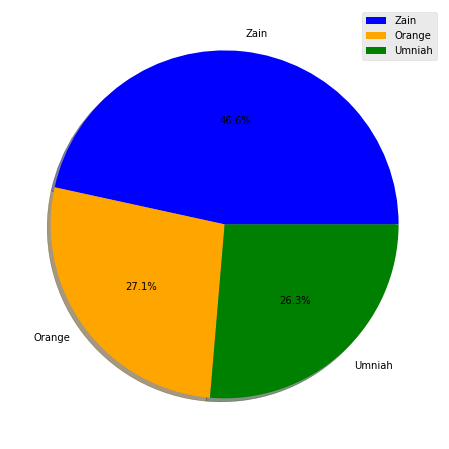

In [278]:
plt.gcf().set_size_inches(8,8)
plt.pie([Zain,Umniah,Orange],labels=["Zain","Orange","Umniah"],colors=["blue","orange","green"],shadow=True,autopct="%1.1f%%")
plt.legend()

there are 11667 unique religion valuea, not unique really, just the spelling or the languge used

In [279]:
df.religion.value_counts()

الاسلام                                                                                                 6531
Muslim                                                                                                  5257
Muslim - Sunni                                                                                          4168
Islam                                                                                                   4113
مسلم                                                                                                    3580
                                                                                                        ... 
Muslim and proud (Live Free Or Die Hard)                                                                   1
مسلم سني وألي الفخر                                                                                        1
moslem (i hane nothig .........................shiet i dont need any person on my life                     1
الاسلام (أشهد ان لا

In [280]:
df=df.replace({"religion":[".*(سن|Islam|isl|Musulman|sl|Ислам|SL|Sl|سل|مح|محم).*"]},"Muslim",regex=True)

In [281]:
df=df.replace({"religion":[".*(Христианство|sih|seh|cristian|atholic|ch|CH|Ch|مسي).*"]},"Christian",regex=True)

In [282]:
df=df.replace({"religion":[".*(God|god|GOD|Other|other).*"]},"Other",regex=True)

In [283]:
df=df.replace({"religion":[".*(الله|م|ﺍﻟ|isalam|ﺍﻟﻠﻪ|Isalm|allah|ﻣﺴﻠﻢ|Allah|isalm|لل|الا).*"]},"Muslim",regex=True)

In [284]:
df=df.replace({"religion":[".*(indu|udd).*"]},"Hindu & Buddhist",regex=True)

In [285]:
df=df.replace({"religion":[".*(uman|UMAN).*"]},"Humanism",regex=True)

In [286]:
df=df.replace({"religion":[".*(ruze|urzi).*"]},"Druze",regex=True)

In [287]:
df=df.replace({"religion":[".*(ecular|gnostic|Ath|None|none|أدري|no|No|NON|non|NO).*"]},"Non believer",regex=True)

the below script shows that the unique values have reduced from 11667 to 421 with around 400 contributing to 1.5% of total records. 
these 1.5% are different spelling, languages and phrases.

In [288]:
df.religion.value_counts()

Muslim          55743
Christian        1751
Other             593
Non believer      140
Humanism           28
                ...  
durze ()            1
Memes ()            1
00                  1
Neutral ()          1
Metal \m/           1
Name: religion, Length: 424, dtype: int64

In [289]:
df.religion.value_counts(normalize=True)[:10]*100

Muslim                              94.852641
Christian                            2.979513
Other                                1.009053
Non believer                         0.238225
Humanism                             0.047645
Hindu & Buddhist                     0.035734
Druze                                0.030629
What are your religious beliefs?     0.010210
ا                                    0.010210
musilm ()                            0.006806
Name: religion, dtype: float64

<AxesSubplot:>

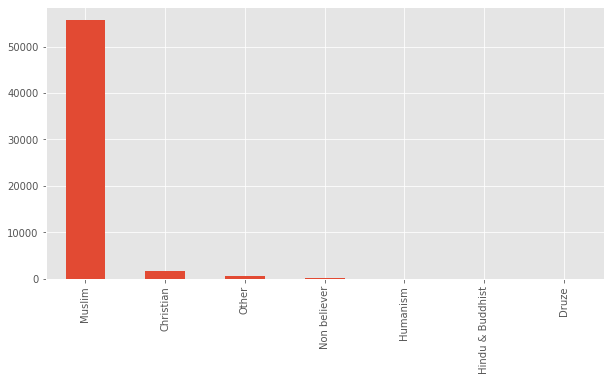

In [290]:
df[df.religion.notna()].religion.value_counts()[0:7].plot(figsize=(10,5),kind="bar")

logarithmic scale, graph could be deceiving, islam has 94.853% of the not nan religion values

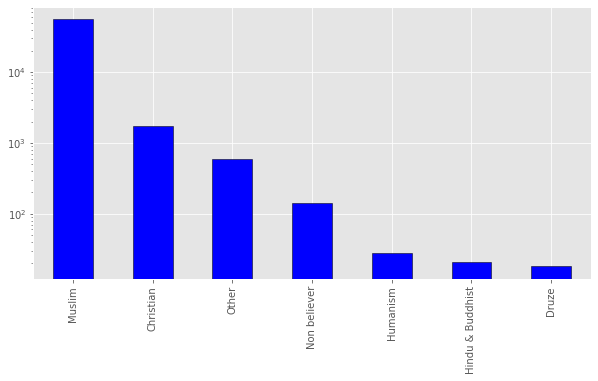

In [335]:
df[df.religion.notna()].religion.value_counts()[0:7].plot(figsize=(10,5),kind="bar",color="blue",edgecolor="black")
plt.yscale("log")

<AxesSubplot:>

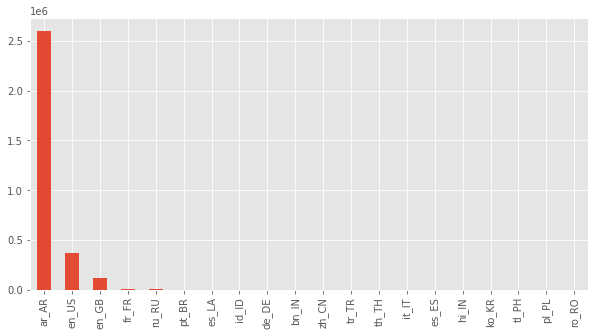

In [292]:
df["lang"].value_counts()[0:20].plot(figsize=(10,5),kind="bar")

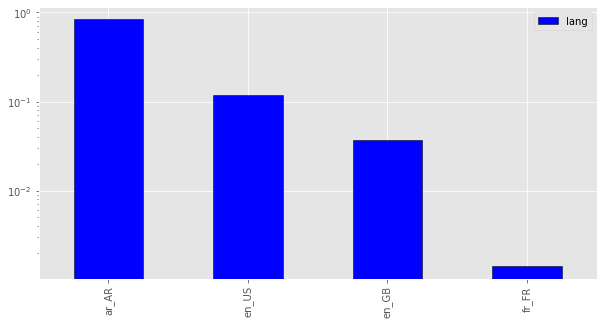

In [334]:
df["lang"].value_counts(normalize=True)[0:4].plot(figsize=(10,5),kind="bar",color="blue",edgecolor="black")
plt.legend()
plt.yscale("log")

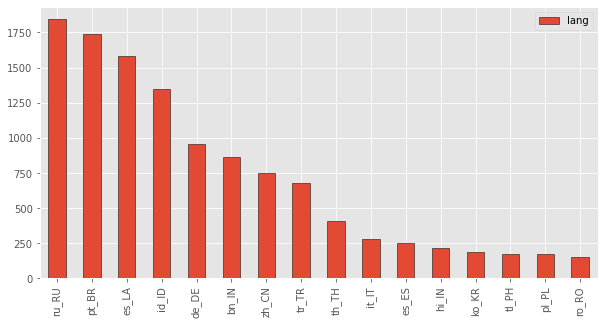

In [333]:
df["lang"].value_counts()[4:20].plot(figsize=(10,5),kind="bar",edgecolor="black")
plt.legend()


top 20 most common names as they are without cleaning, mohamed for example appeared 3 times in top 20, two times written in different ways in english and once in arabic. and some are not considered first names more like part of a nickname, in arabic fathers are called with "father of eldest son name"; in the data first name is roughly translated "father of" ... "mother of" is in top 20 also

<AxesSubplot:ylabel='first'>

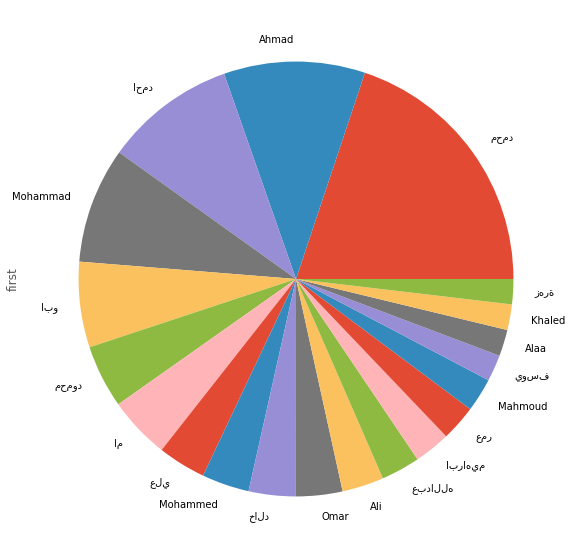

In [332]:
df["first"].value_counts()[:20].plot(figsize=(10,10),kind="pie")
# df.religion.value_counts()

In [296]:
dateSeries=df.birthday.dropna()

strings without year were suffexed by the year 2020 because there is a leap year date "02/29"

In [297]:
one=dateSeries[~dateSeries.str.contains(r"\d\d\d")]+"/2020"

In [298]:
two=dateSeries[dateSeries.str.contains(r"\d\d\d")]

concatenate the modified dates with the ones with year

In [299]:
dates=pd.concat([two,one],axis=0)

In [300]:
dates=pd.to_datetime(dates)

<AxesSubplot:>

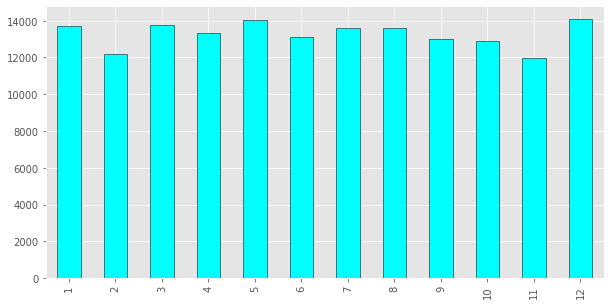

In [329]:
dates.dt.month.value_counts().sort_index().plot(figsize=(10,5),kind="bar",color="cyan",edgecolor="black")

decided to not include the dates that were missing years

<AxesSubplot:>

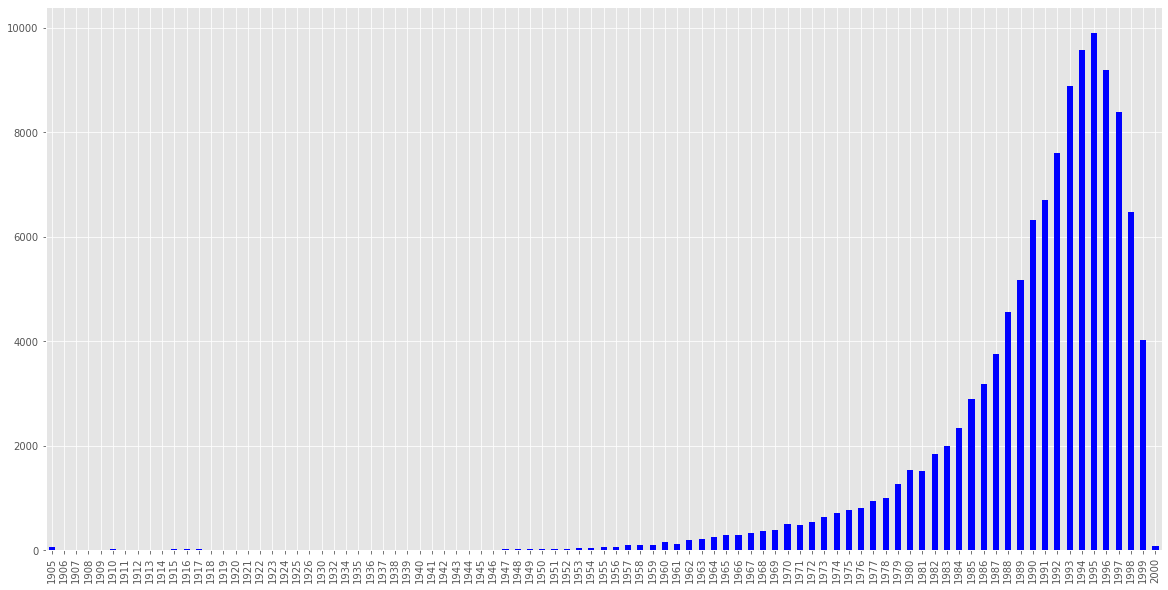

In [302]:
dates.dt.year.value_counts()[1:].sort_index().plot(figsize=(20,10),kind="bar",color="b")

In [303]:
two=pd.to_datetime(two)

In [304]:
dat=two.dt.month.groupby(two.dt.day).value_counts().unstack()

As shown in the heatmap there was a preference for birthdays with repeted numbers like 1/1 2/2 3/3 .... because of the way they sound including the first of each month and the end of the year

with less preference but still noticable on 21/1 , 22/2 , 23/3 , 24/4 , ....

Feb 14 : valentines's Day, Nov 14 : children's Day, Mar 21 : Mother's Day


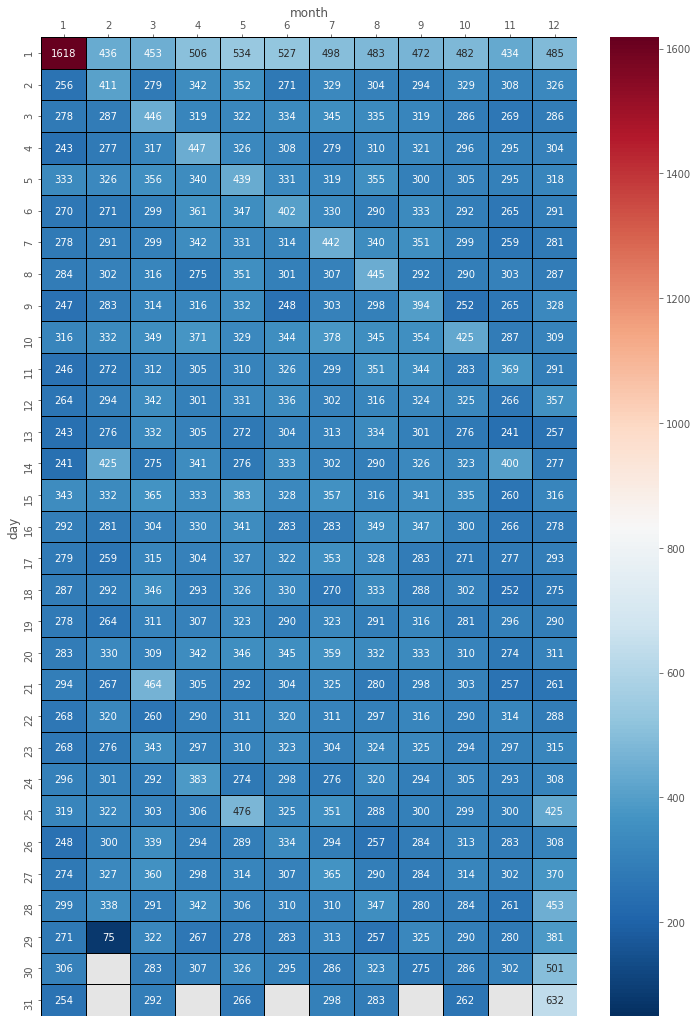

In [305]:
fig,ax=plt.subplots(figsize=(12,18))
sns.heatmap(dat,cmap="RdBu_r",vmin=50,annot=True,fmt=".0f",linewidths=1,linecolor="black")
plt.ylabel("day")
plt.xlabel("month")
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

In [306]:
emails=df.email.dropna().drop_duplicates()

In [307]:
provider=emails.str.extract(r"@(.*?)\.",expand=False).value_counts()[:10]

Text(0.5, 1.0, 'count of top 10 email providers')

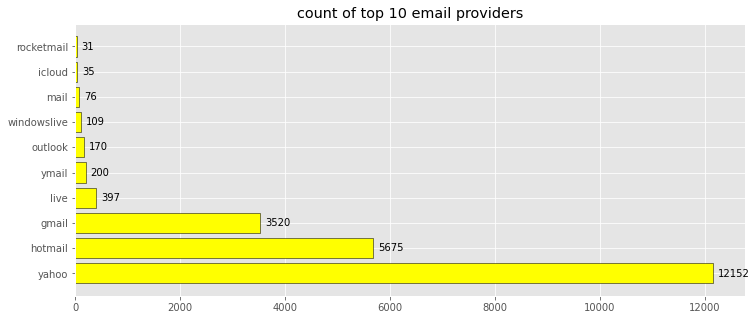

In [327]:
fig,ax=plt.subplots(figsize=(12,5))
# plt.text(20,20,"eggs",ha="right")
# provider.plot(,kind="bar",color="black")
# plt.xticks(rotation=90)
bars=ax.barh(provider.index,provider.values,color="yellow",edgecolor="black")
ax.bar_label(bars,padding=5)
# ax.invert_yaxis()
plt.title("count of top 10 email providers")


In [309]:
# ddata=newd[["religion","birthday","gender","lang","first"]]
# ddata.count()

In [310]:
# ddata.to_csv("modifiedJO.csv",index=False)

In [311]:
# df.to_csv("1.csv",index=False)

In [312]:
# dates.to_csv("2.csv",index=False)

In [313]:
# provider.to_csv("3.csv",index=False)